# Manya Rawat 
# 23118044
# Metallurgy (MT-1)

# ABOUT DATASET


Description:
This dataset contains sales transaction records for an electronics company over a one-year period, spanning from September 2023 to September 2024. It includes detailed information about customer demographics, product types, and purchase behaviors.

Key Features:

Customer ID: Unique identifier for each customer.

Age: Age of the customer (numeric)

Gender: Gender of the customer (Male or Female)

Loyalty Member: (Yes/No) (Values change by time, so pay attention to who cancelled and who signed up)

Product Type: Type of electronic product sold (e.g., Smartphone, Laptop, Tablet)

SKU: a unique code for each product.

Rating: Customer rating of the product (1-5 stars) (Should have no Null Ratings)

Order Status: Status of the order (Completed, Cancelled)

Payment Method: Method used for payment (e.g., Cash, Credit Card, Paypal)

Total Price: Total price of the transaction (numeric)

Unit Price: Price per unit of the product (numeric)

Quantity: Number of units purchased (numeric)

Purchase Date: Date of the purchase (format: YYYY-MM-DD)

Shipping Type: Type of shipping chosen (e.g., Standard, Overnight, Express)

Add-ons Purchased: List of any additional items purchased (e.g., Accessories, Extended Warranty)

Add-on Total: Total price of add-ons purchased (numeric)

# Data Stats:

Total Rows: 20,000

Time Period: September 2023 to September 2024

Product Types: Includes various electronics such as Smartphones, Laptops, Tablets, and Smartwatches.



# Univariate Analysis

In [1]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# link to the kaggle dataset- https://www.kaggle.com/datasets/cameronseamons/electronic-sales-sep2023-sep2024

In [2]:
#loading the dataset
df=pd.read_csv('Electronic_sales.csv') # Downloaded the electronic_sales.csv file from kaggle and directly using it

df.head()

,Customer ID,Age,Gender,Loyalty Member,Product Type,SKU,Rating,Order Status,Payment Method,Total Price,Unit Price,Quantity,Purchase Date,Shipping Type,Add-ons Purchased,Add-on Total
0,1000,53,Male,No,Smartphone,SKU1004,2,Cancelled,Credit Card,5538.33,791.19,7,2024-03-20,Standard,"Accessory,Accessory,Accessory",40.21
1,1000,53,Male,No,Tablet,SKU1002,3,Completed,Paypal,741.09,247.03,3,2024-04-20,Overnight,Impulse Item,26.09
2,1002,41,Male,No,Laptop,SKU1005,3,Completed,Credit Card,1855.84,463.96,4,2023-10-17,Express,NaN,0.00
3,1002,41,Male,Yes,Smartphone,SKU1004,2,Completed,Cash,3164.76,791.19,4,2024-08-09,Overnight,"Impulse Item,Impulse Item",60.16
4,1003,75,Male,Yes,Smartphone,SKU1001,5,Completed,Cash,41.50,20.75,2,2024-05-21,Express,Accessory,35.56


In [3]:
df.shape

(20000, 16)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Customer ID        20000 non-null  int64  
 1   Age                20000 non-null  int64  
 2   Gender             19999 non-null  object 
 3   Loyalty Member     20000 non-null  object 
 4   Product Type       20000 non-null  object 
 5   SKU                20000 non-null  object 
 6   Rating             20000 non-null  int64  
 7   Order Status       20000 non-null  object 
 8   Payment Method     20000 non-null  object 
 9   Total Price        20000 non-null  float64
 10  Unit Price         20000 non-null  float64
 11  Quantity           20000 non-null  int64  
 12  Purchase Date      20000 non-null  object 
 13  Shipping Type      20000 non-null  object 
 14  Add-ons Purchased  15132 non-null  object 
 15  Add-on Total       20000 non-null  float64
dtypes: float64(3), int64(4

In [5]:
df.describe()

,Customer ID,Age,Rating,Total Price,Unit Price,Quantity,Add-on Total
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,10483.526550,48.994100,3.093950,3180.133419,578.631867,5.485550,62.244848
std,5631.732525,18.038745,1.223764,2544.978675,312.274076,2.870854,58.058431
min,1000.000000,18.000000,1.000000,20.750000,20.750000,1.000000,0.000000
25%,5478.000000,33.000000,2.000000,1139.680000,361.180000,3.000000,7.615000
50%,10499.500000,49.000000,3.000000,2534.490000,463.960000,5.000000,51.700000
75%,15504.000000,65.000000,4.000000,4639.600000,791.190000,8.000000,93.842500
max,19998.000000,80.000000,5.000000,11396.800000,1139.680000,10.000000,292.770000


In [6]:
df.isnull().sum()       # checking for the null values in the dataset

Customer ID             0
Age                     0
Gender                  1
Loyalty Member          0
Product Type            0
SKU                     0
Rating                  0
Order Status            0
Payment Method          0
Total Price             0
Unit Price              0
Quantity                0
Purchase Date           0
Shipping Type           0
Add-ons Purchased    4868
Add-on Total            0
dtype: int64

### Here, we can see gender has 1 missing value and  ads_on_purchased column has 4868 missing values.

# Filling missing values

### 1) for gender column

In [7]:
df['Gender'].mode()[0]  # checking the mode of the data to fill in the gender  column

'Male'

In [8]:
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])

In [9]:
df.isna().sum()

Customer ID             0
Age                     0
Gender                  0
Loyalty Member          0
Product Type            0
SKU                     0
Rating                  0
Order Status            0
Payment Method          0
Total Price             0
Unit Price              0
Quantity                0
Purchase Date           0
Shipping Type           0
Add-ons Purchased    4868
Add-on Total            0
dtype: int64

### Now , we can see that gender column has no missing values

### 2) for Ads_on_purchased column

Since our dataset has sufficient data for our use and purpose. Hence we can drop the rows with the na values. still we are left with 15000 rows which are sufficient to train a model and gainful insights from it.

In [10]:
df=df.dropna()             # dropping the rows having na values
df.head(5)

,Customer ID,Age,Gender,Loyalty Member,Product Type,SKU,Rating,Order Status,Payment Method,Total Price,Unit Price,Quantity,Purchase Date,Shipping Type,Add-ons Purchased,Add-on Total
0,1000,53,Male,No,Smartphone,SKU1004,2,Cancelled,Credit Card,5538.33,791.19,7,2024-03-20,Standard,"Accessory,Accessory,Accessory",40.21
1,1000,53,Male,No,Tablet,SKU1002,3,Completed,Paypal,741.09,247.03,3,2024-04-20,Overnight,Impulse Item,26.09
3,1002,41,Male,Yes,Smartphone,SKU1004,2,Completed,Cash,3164.76,791.19,4,2024-08-09,Overnight,"Impulse Item,Impulse Item",60.16
4,1003,75,Male,Yes,Smartphone,SKU1001,5,Completed,Cash,41.50,20.75,2,2024-05-21,Express,Accessory,35.56
5,1004,41,Female,No,Smartphone,SKU1001,5,Completed,Credit Card,83.00,20.75,4,2024-05-26,Standard,"Impulse Item,Accessory",65.78


In [11]:
df.shape     # now we are left with 15132 rows.

(15132, 16)

In [12]:
df.describe(include='all')     # checking the mean,mode and other mathematical parameter for all the columns of the dataset including categorical and numerical

,Customer ID,Age,Gender,Loyalty Member,Product Type,SKU,Rating,Order Status,Payment Method,Total Price,Unit Price,Quantity,Purchase Date,Shipping Type,Add-ons Purchased,Add-on Total
count,15132.000000,15132.000000,15132,15132,15132,15132,15132.000000,15132,15132,15132.000000,15132.000000,15132.000000,15132,15132,15132,15132.000000
unique,NaN,NaN,2,2,5,10,NaN,2,6,NaN,NaN,NaN,366,5,75,NaN
top,NaN,NaN,Male,No,Smartphone,TBL345,NaN,Completed,Credit Card,NaN,NaN,NaN,2024-06-24,Standard,Extended Warranty,NaN
freq,NaN,NaN,7656,11842,4492,1582,NaN,10145,4446,NaN,NaN,NaN,69,5105,1701,NaN
mean,10503.843841,48.992400,NaN,NaN,NaN,NaN,3.088686,NaN,NaN,3184.261850,580.367742,5.473236,NaN,NaN,NaN,82.269162
std,5614.621186,18.020315,NaN,NaN,NaN,NaN,1.226645,NaN,NaN,2547.867058,311.934802,2.879513,NaN,NaN,NaN,52.988196
min,1000.000000,18.000000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,20.750000,20.750000,1.000000,NaN,NaN,NaN,5.010000
25%,5534.500000,34.000000,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,1139.680000,361.180000,3.000000,NaN,NaN,NaN,42.360000
50%,11036.500000,49.000000,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,2534.490000,674.320000,5.000000,NaN,NaN,NaN,71.990000
75%,15514.500000,65.000000,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,4639.600000,791.190000,8.000000,NaN,NaN,NaN,108.965000


In [13]:
df.describe(include='object')    # to check the metrics for the categorical variables

,Gender,Loyalty Member,Product Type,SKU,Order Status,Payment Method,Purchase Date,Shipping Type,Add-ons Purchased
count,15132,15132,15132,15132,15132,15132,15132,15132,15132
unique,2,2,5,10,2,6,366,5,75
top,Male,No,Smartphone,TBL345,Completed,Credit Card,2024-06-24,Standard,Extended Warranty
freq,7656,11842,4492,1582,10145,4446,69,5105,1701


# checking the value counts in the categorical variables

In [14]:
# only columns which are object are included
columns=['Gender',
 'Loyalty Member',
 'Product Type',
 'SKU',
 'Order Status',
 'Payment Method',
 'Purchase Date',
 'Shipping Type']

for i in columns:
    print(df[i].value_counts())
    print('\n')
    print("*"*50)

Gender
Male      7656
Female    7476
Name: count, dtype: int64


**************************************************
Loyalty Member
No     11842
Yes     3290
Name: count, dtype: int64


**************************************************
Product Type
Smartphone    4492
Tablet        3117
Laptop        3003
Smartwatch    2992
Headphones    1528
Name: count, dtype: int64


**************************************************
SKU
TBL345     1582
SKU1002    1535
HDP456     1527
SKU1005    1514
SKU1004    1511
SKU1003    1509
SMP234     1507
LTP123     1489
SWT567     1484
SKU1001    1474
Name: count, dtype: int64


**************************************************
Order Status
Completed    10145
Cancelled     4987
Name: count, dtype: int64


**************************************************
Payment Method
Credit Card      4446
Bank Transfer    2600
PayPal           2456
Cash             1899
Paypal           1890
Debit Card       1841
Name: count, dtype: int64


*****************************

# Normalizing the values in the columns

In [16]:
for col in columns :
    print(df[col].value_counts(normalize=True))
    print('\n')
    print("*"*50)

Gender
Male      0.505948
Female    0.494052
Name: proportion, dtype: float64


**************************************************
Loyalty Member
No     0.78258
Yes    0.21742
Name: proportion, dtype: float64


**************************************************
Product Type
Smartphone    0.296854
Tablet        0.205987
Laptop        0.198454
Smartwatch    0.197727
Headphones    0.100978
Name: proportion, dtype: float64


**************************************************
SKU
TBL345     0.104547
SKU1002    0.101441
HDP456     0.100912
SKU1005    0.100053
SKU1004    0.099855
SKU1003    0.099722
SMP234     0.099590
LTP123     0.098401
SWT567     0.098070
SKU1001    0.097409
Name: proportion, dtype: float64


**************************************************
Order Status
Completed    0.670434
Cancelled    0.329566
Name: proportion, dtype: float64


**************************************************
Payment Method
Credit Card      0.293814
Bank Transfer    0.171821
PayPal           0.16230

In [18]:
df['Payment Method'] = df['Payment Method'].replace('PayPal','Paypal').astype('object')
df['Payment Method'] 
#replacing the string 'PayPal' with 'Paypal' in the 'Payment Method' column and then converting  the column data type to object. 

0          Credit Card
1               Paypal
3                 Cash
4                 Cash
5          Credit Card
             ...      
19990    Bank Transfer
19992           Paypal
19993           Paypal
19997    Bank Transfer
19998    Bank Transfer
Name: Payment Method, Length: 15132, dtype: object

In [19]:
df['Payment Method'].dtype

dtype('O')

### Now, payment method column has been converted to object type.'PayPal' has been replaced by 'Paypal'. The column will now also be of type object if it wasn't already.

In [22]:
df['Purchase Date'] = pd.to_datetime(df['Purchase Date'])       
df.dtypes

Customer ID                   int64
Age                           int64
Gender                       object
Loyalty Member               object
Product Type                 object
SKU                          object
Rating                        int64
Order Status                 object
Payment Method               object
Total Price                 float64
Unit Price                  float64
Quantity                      int64
Purchase Date        datetime64[ns]
Shipping Type                object
Add-ons Purchased            object
Add-on Total                float64
dtype: object

### The purchse_date column which was initially a string column and we would not be able to apply the dattime operations on it. so, we have now converted the Purchase Date into datetime and we can easily apply the datetime functions and operations on it.

### VISUALIZING THE DATASET

### We have already found the value counts for the columns in dataset now we will plot the countplot for each column

C:\Users\ACER\AppData\Local\Temp\ipykernel_10504\2036522456.py:10: UserWarning: The figure layout has changed to tight
  plt.tight_layout()  # Adjust layout to prevent overlap
C:\Users\ACER\AppData\Local\Temp\ipykernel_10504\2036522456.py:10: UserWarning: The figure layout has changed to tight
  plt.tight_layout()  # Adjust layout to prevent overlap
C:\Users\ACER\AppData\Local\Temp\ipykernel_10504\2036522456.py:10: UserWarning: The figure layout has changed to tight
  plt.tight_layout()  # Adjust layout to prevent overlap
C:\Users\ACER\AppData\Local\Temp\ipykernel_10504\2036522456.py:10: UserWarning: The figure layout has changed to tight
  plt.tight_layout()  # Adjust layout to prevent overlap
C:\Users\ACER\AppData\Local\Temp\ipykernel_10504\2036522456.py:10: UserWarning: The figure layout has changed to tight
  plt.tight_layout()  # Adjust layout to prevent overlap
C:\Users\ACER\AppData\Local\Temp\ipykernel_10504\2036522456.py:10: UserWarning: The figure layout has changed to tight
 

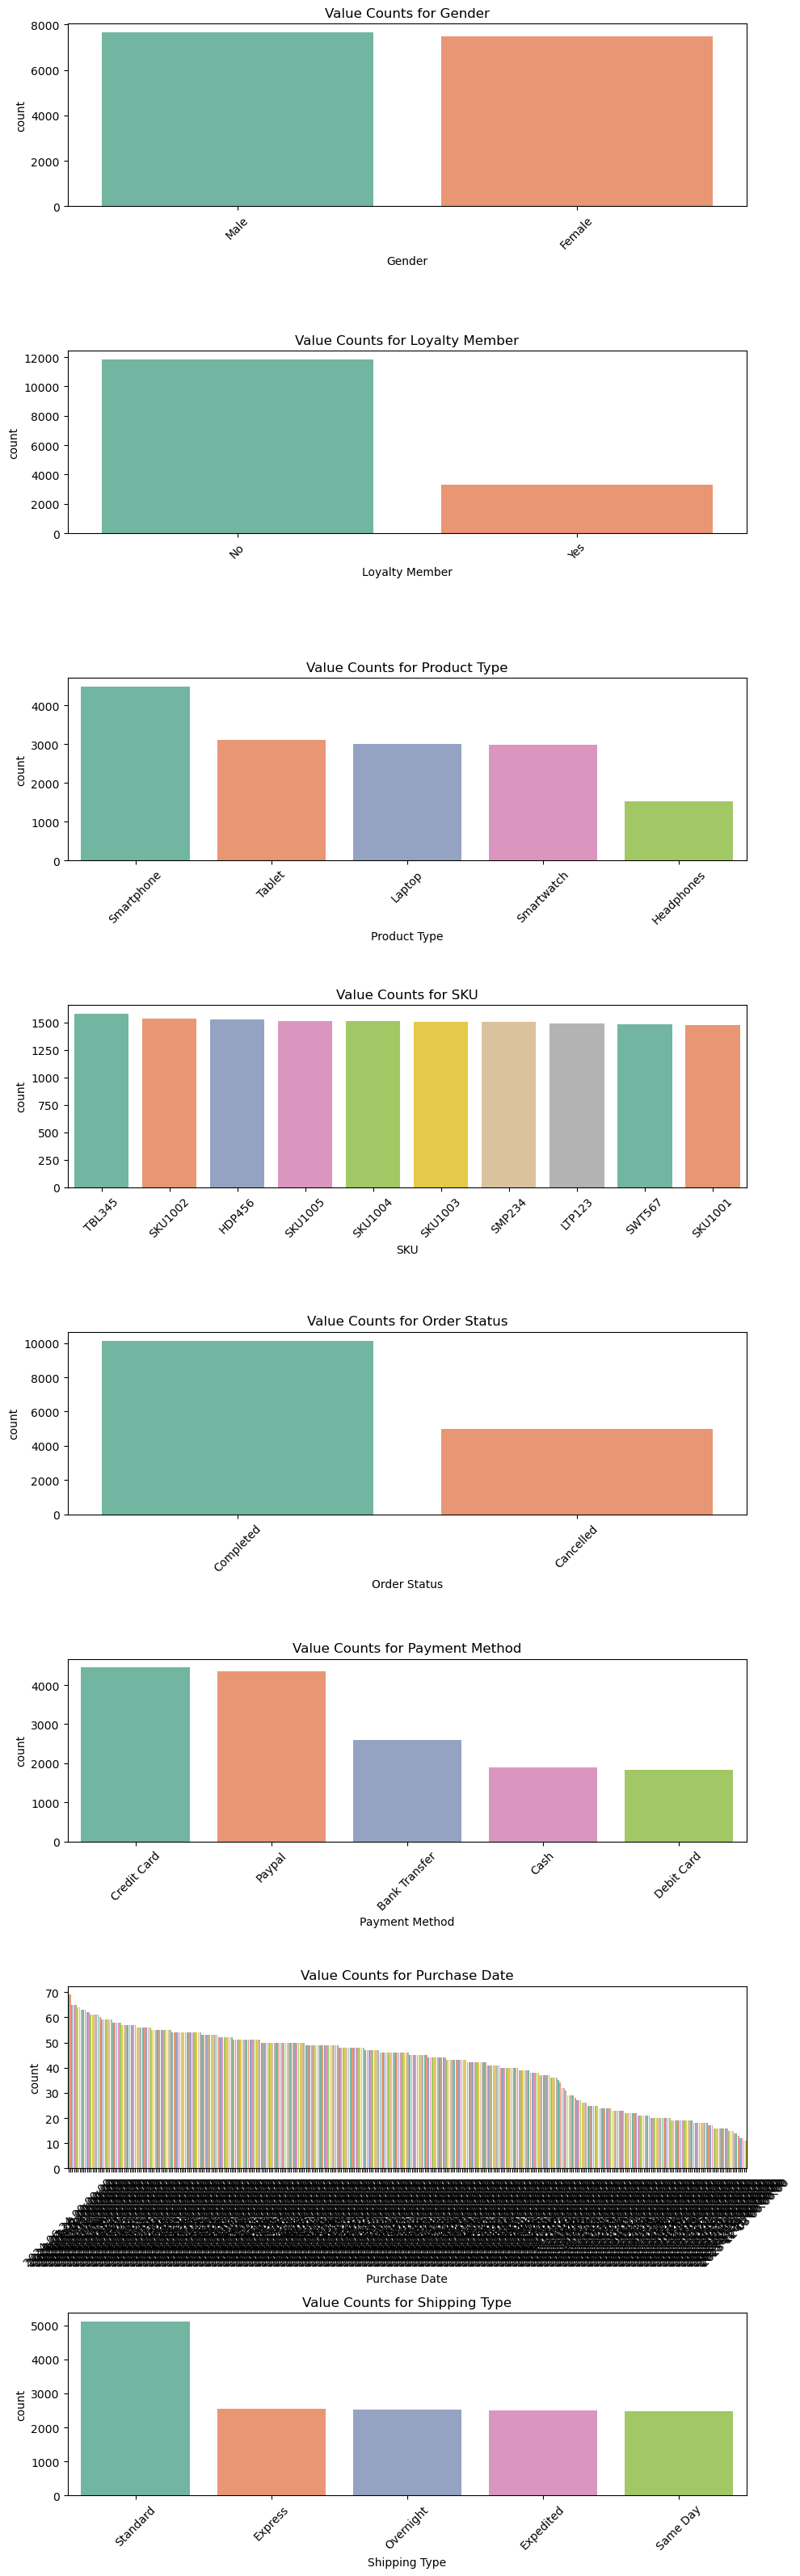

In [23]:
# Set up the plotting environment
plt.figure(figsize=(10, len(columns)*4))

# Iterate through each categorical column and plot the value counts
for i, col in enumerate(columns):
    plt.subplot(len(columns), 1, i + 1)  # Create a subplot for each column
    sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette="Set2")
    plt.title(f"Value Counts for {col}")
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.tight_layout()  # Adjust layout to prevent overlap

# Show the plots
plt.show()

## we can conclude the following by seeing the countplots of the dataset

1) Smartphones are the most sold product type, followed by Tablets and Laptops.
2) From the total sales by product type,Smartphones generate the highest revenue, followed by Laptops and Tablets.
3) The majority of orders are completed, while a significant portion is canceled.

### frequency of the sales distrivution in context of age

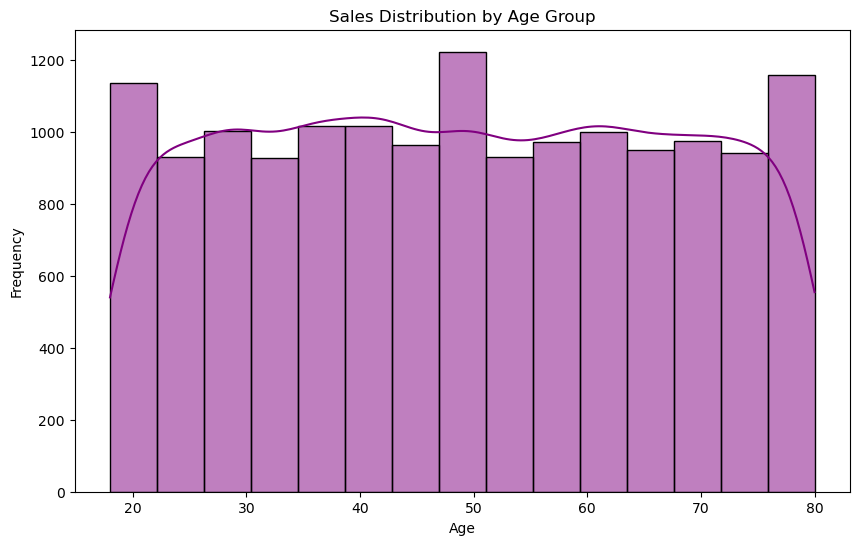

In [24]:
# 3. Sales by Age Group
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', bins=15, kde=True, color='purple')
plt.title('Sales Distribution by Age Group')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

###  We can see that customers span various age groups, but there is a slight concentration of sales among customers aged 40–60.

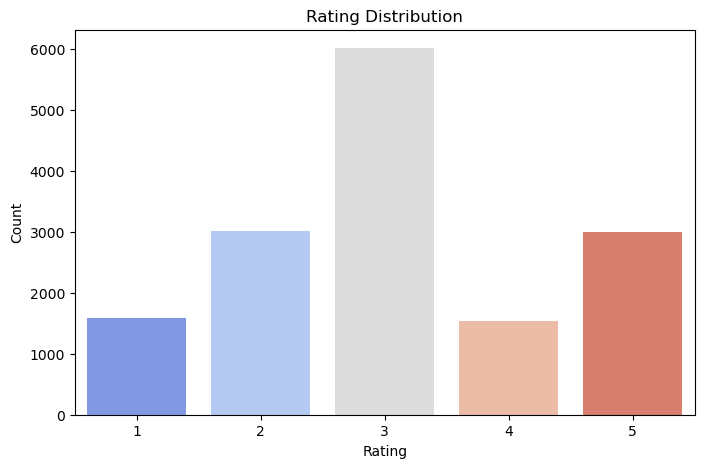

In [26]:
# 4. Rating Distribution for Products
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Rating', palette='coolwarm')
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

#

### Here,Ratings are spread across 1 to 5 stars, with 3 stars being the most common rating.

# Checking for outliers using boxplot or checking the distribution

C:\Users\ACER\AppData\Local\Temp\ipykernel_10504\3613183861.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()  # Adjusts layout so that subplots do not overlap
C:\Users\ACER\AppData\Local\Temp\ipykernel_10504\3613183861.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()  # Adjusts layout so that subplots do not overlap
C:\Users\ACER\AppData\Local\Temp\ipykernel_10504\3613183861.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()  # Adjusts layout so that subplots do not overlap
C:\Users\ACER\AppData\Local\Temp\ipykernel_10504\3613183861.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()  # Adjusts layout so that subplots do not overlap
C:\Users\ACER\AppData\Local\Temp\ipykernel_10504\3613183861.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()  # Adjusts layout so that subplots do not overlap
C:\Users\ACER\AppData\Local\Temp\ipykernel_10504\361318

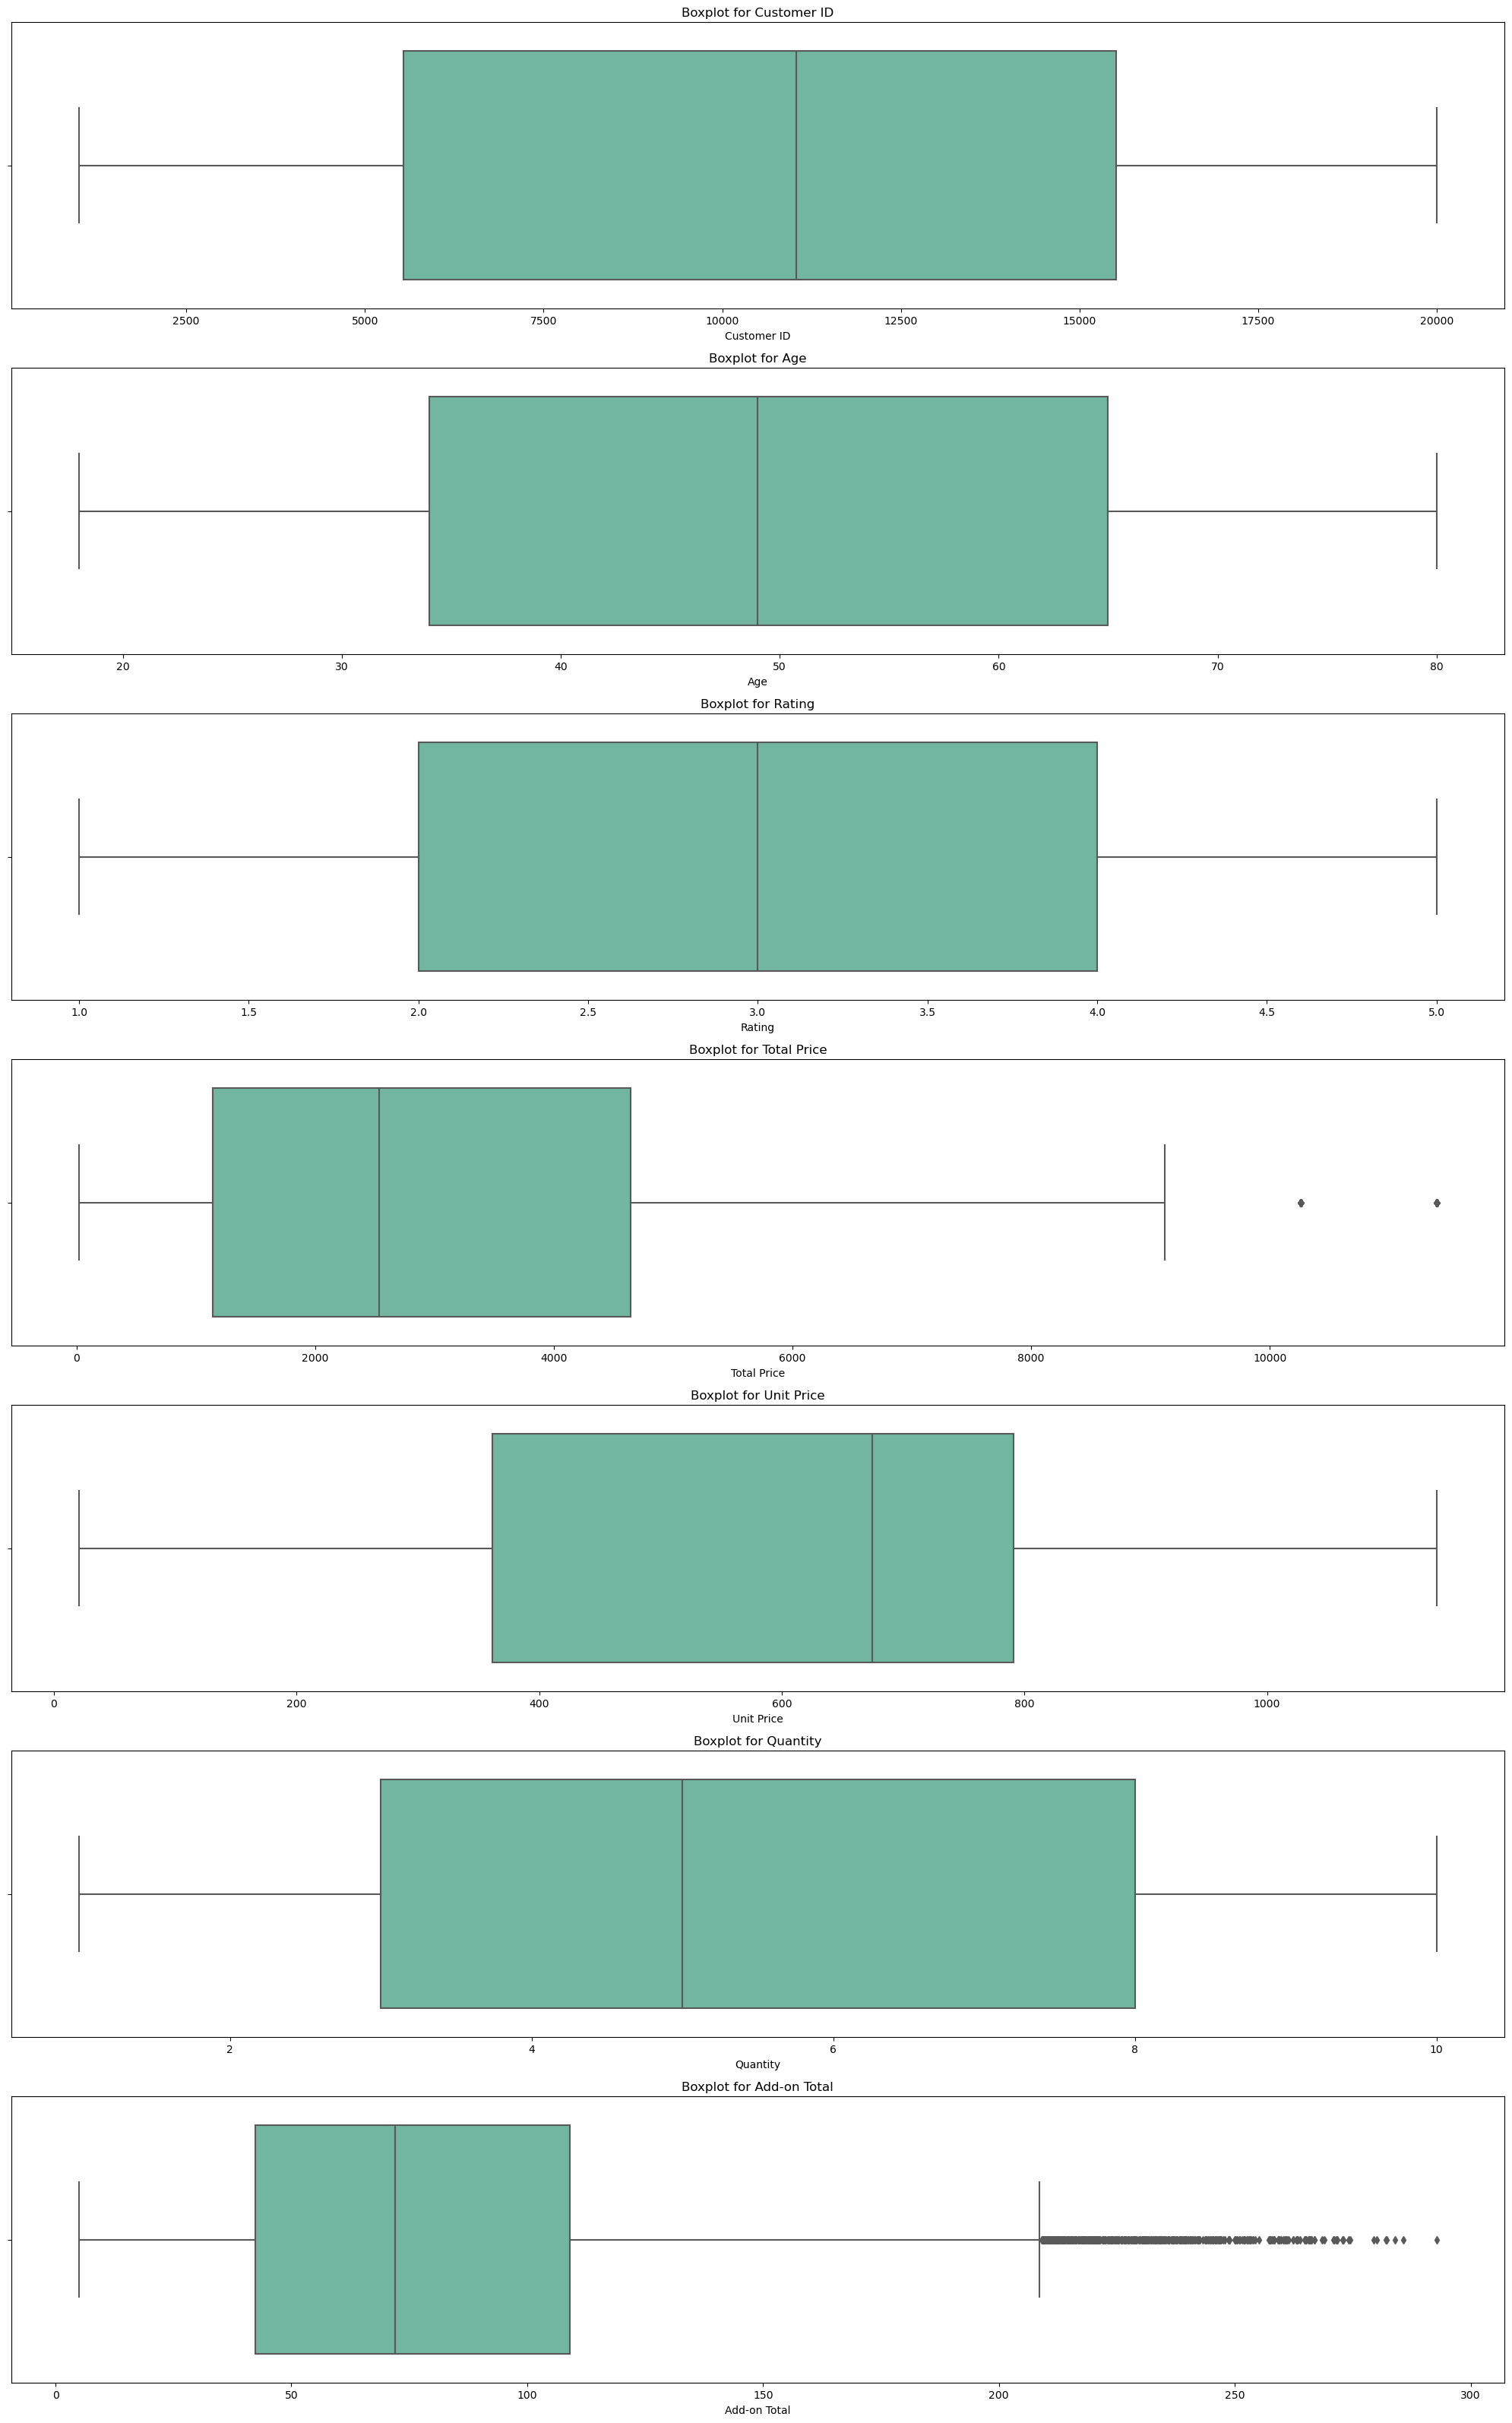

In [30]:

# Set up the plotting environment
plt.figure(figsize=(20, len(df.columns)*2))  # Adjust the size according to the number of columns

# Create boxplot for each column
for i, col in enumerate(df.select_dtypes(include=['int64', 'float64']).columns):
    plt.subplot(len(df.select_dtypes(include=['int64', 'float64']).columns), 1, i + 1)
    sns.boxplot(data=df, x=col, palette="Set2")
    plt.title(f'Boxplot for {col}')
    plt.tight_layout()  # Adjusts layout so that subplots do not overlap



# PAIRPLOT FOR THE COLUMNS OF THE DATASET

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


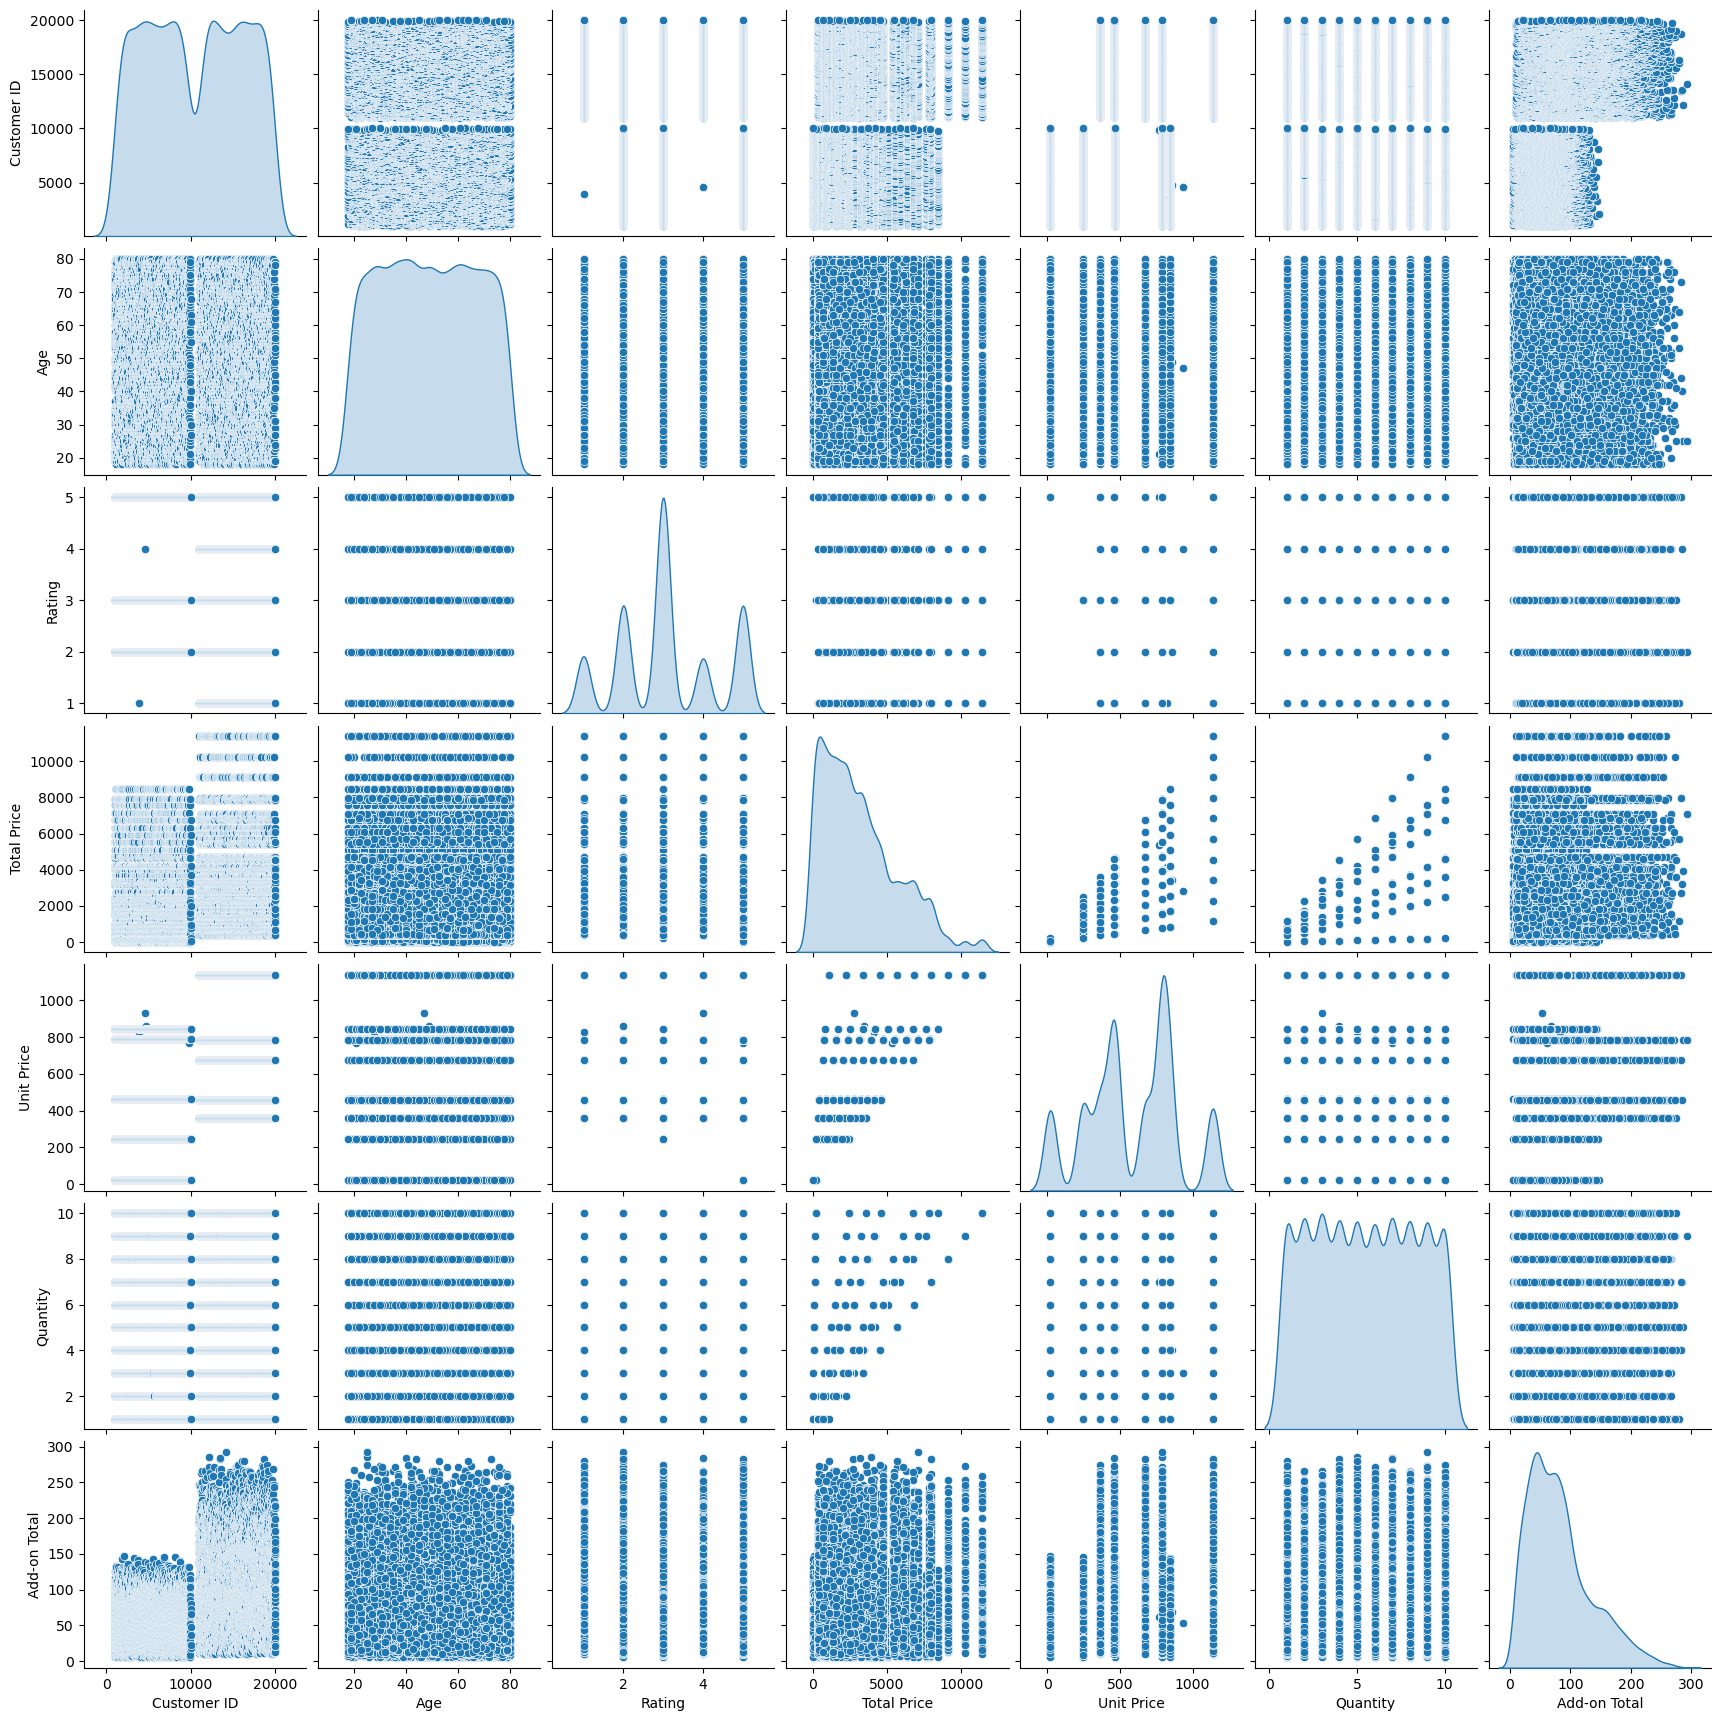

In [34]:
sns.pairplot(df, kind='scatter', diag_kind='kde')

#  Correlation Analysis: Heatmap of correlations between numeric variables

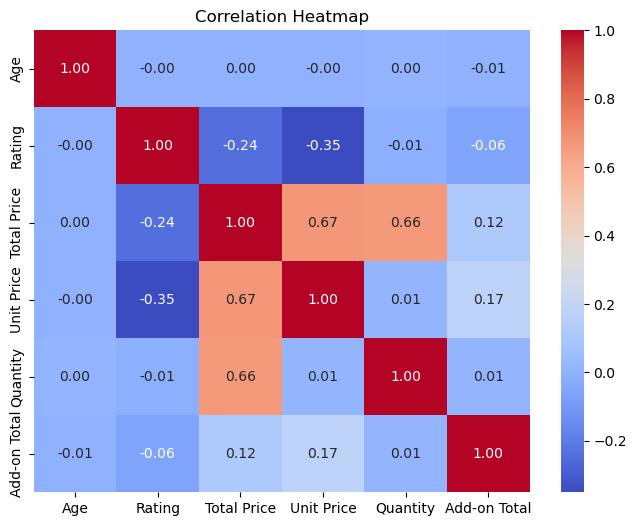

In [32]:

correlation_matrix = df[['Age', 'Rating', 'Total Price', 'Unit Price', 'Quantity', 'Add-on Total']].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

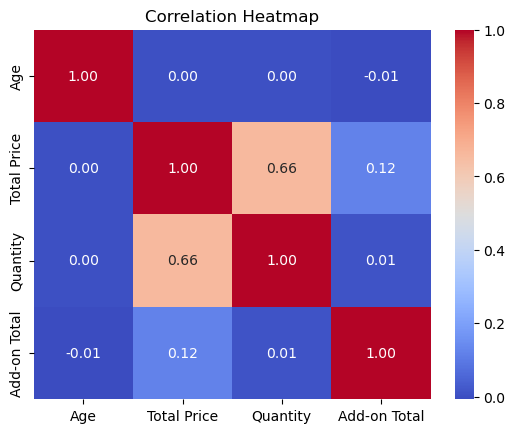

In [33]:

correlation_matrix = df[['Age', 'Total Price', 'Quantity', 'Add-on Total']].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Conclusions and Decisions Derived from the Analyses
### Most Profitable Products:
Based on the revenue analysis by product type, the company should focus on high-revenue products, such as smartphones, and allocate more resources towards marketing and logistics for these products.
### Increase Value with Add-ons:
Add-ons like accessories and impulse items increase the total sales per transaction. The company can optimize its offerings by promoting bundled packages with-ons addto maximize revenue.
### Reduce Order Cancellations:
By identifying which age groups or customer segments are more likely to cancel orders, the company can target these groups with improved customer experiences, such as streamlining payment or enhancing shipping options.
### Optimize Payment Methods:
If certain payment methods are linked to higher cancellation rates, the company should improve the payment experience for these methods or incentivize customers to use more reliable payment options.
### Increase Customer Loyalty:
The loyalty program seems to encourage repeat purchases. If the data shows that repeat customers spend more, the company should target these repeat customers with exclusive offers and incentive programs to boost loyalty and lifetime customer value.